In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
file_path = '../Data/CustomerChurn_RAW.csv'

In [3]:
#### Reading CSV file
df_raw = pd.read_csv(file_path)

In [4]:
df_raw.shape

(7043, 21)

In [5]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#### Numerical Columns
numerical_cols = [column for column in df_raw.columns if df_raw[column].dtype != 'O']

In [7]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [8]:
len(numerical_cols)

3

In [9]:
#### Categorical Columns
categorical_cols = [column for column in df_raw.columns if df_raw[column].dtype == 'O']

In [10]:
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
len(categorical_cols)

18

In [12]:
#### Dataset inspection
df_raw.head().append(df_raw.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
#### Dataset information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Observation: TotalCharges is Object , it should have been Int

In [14]:
### Check null values
df_raw.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Observation: No null values

In [15]:
#### Check for duplicates
df_raw.duplicated().sum()

0

##### Observation: No duplicates

In [16]:
df_copy = df_raw.copy()

In [17]:
#### Datatype conversion -- TotalCharges
df_copy['TotalCharges'] = pd.to_numeric(
    df_copy['TotalCharges'].str.replace(' ', ''),
    errors='coerce'
)

In [18]:
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#### Total Nan Values in %
print('Percentage of Total Nan Values :',(df_copy.isnull().sum().sum()/len(df_copy)*100).round(2))

Percentage of Total Nan Values : 0.16


In [20]:
#### As the NaN values are <5% we can drop them
df_copy = df_copy.dropna()

In [21]:
#### Length after dropping NaN
len(df_copy)

7032

<AxesSubplot:>

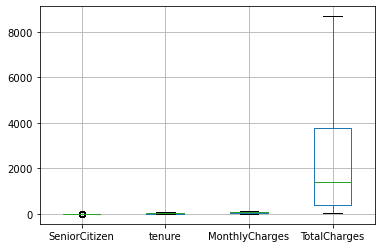

In [22]:
#### Check for outliers
df_copy.boxplot()

##### Observation: Outliers detected

In [23]:
#### outlier capping
def outlier_capping(df_copy,column):
    Q1= df_copy[column].quantile(0.25)
    Q3= df_copy[column].quantile(0.75)
    IQR =Q3-Q1
    Lower_Extreme= Q1-1.5*IQR
    Upper_Extreme= Q3+1.5*IQR
    df_copy[column]= df_copy[column].apply(lambda x: Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df_copy.select_dtypes(['int','float']).columns:
    outlier_capping(df_copy,col)

<AxesSubplot:>

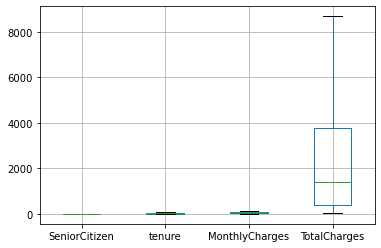

In [24]:
df_copy.boxplot()

In [25]:
df_copy['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [26]:
df_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
#### Features and Target Split:
features = df_copy.drop(columns = ['Churn'])
Target = df_copy['Churn']
print('Features:\n ',[feature for feature in features],'\n',
      '\nTarget\n',Target)

Features:
  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] 
 
Target
 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [28]:
customer_ids = features['customerID']
features.drop(columns = ['customerID'], inplace = True)

In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   float64
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [30]:
categorical_features = [feature for feature in features.columns if features[feature].dtype == 'O']
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [31]:
numerical_features = [feature for feature in features.columns if features[feature].dtype != 'O']
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
# Labelling Feature object Variables
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
ord_enc = OrdinalEncoder(categories=ordinal_categories)
one_hot = OneHotEncoder()
lab_enc = LabelEncoder()



#### by Inspection: 1.Ordinal column Found
#### Ordinal Encoing "Contract" column

In [35]:
features.Contract.unique()

array([0., 1., 2.])

In [33]:
# 1. Define the correct, ordered sequence for the 'Contract' feature
contract_order = ['Month-to-month', 'One year', 'Two year']

# 2. Combine all ordinal column orders into a list of lists (for OrdinalEncoder)
# Since 'Contract' is the only ordinal column identified, this list only contains one element:
ordinal_categories = [contract_order] 

# 3. Select the column
ordinal_cols = ['Contract']

# 4. set custom order 
ord_enc = OrdinalEncoder(categories=ordinal_categories)

# Encode the column
features[ordinal_cols] = ord_enc.fit_transform(features[ordinal_cols])

In [36]:
features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0.0,Yes,Electronic check,29.85,29.85
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1.0,No,Mailed check,56.95,1889.50
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,53.85,108.15
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0.0,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1.0,Yes,Mailed check,84.80,1990.50
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1.0,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,0.0,Yes,Electronic check,29.60,346.45
7041,Male,0.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,0.0,Yes,Mailed check,74.40,306.60


#### Other Categorical Features in features is Nominal
####  encoding Nominal Cols using get_dummies

In [37]:
features = pd.get_dummies(features, dtype = 'int')

In [38]:
features

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1,0.0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.0,34,1.0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0.0,2,0.0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.0,45,1.0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,0.0,2,0.0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24,1.0,84.80,1990.50,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
7039,0.0,72,1.0,103.20,7362.90,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
7040,0.0,11,0.0,29.60,346.45,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,0.0,4,0.0,74.40,306.60,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [39]:
#### Encoding Target
Target = df_copy[['Churn']]
Target['Churn'] = lab_enc.fit_transform(Target['Churn'])
Target

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [40]:
features.isnull().sum()

SeniorCitizen                              0
tenure                                     0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features, Target)

# Get the feature importances and store them in a Series
importance_series = pd.Series(rf_model.feature_importances_, index=features.columns)

# Sort the features by importance
sorted_importance = importance_series.sort_values(ascending=False)

print("Top 15 Features by Importance:")
print(sorted_importance.head(15))

Top 15 Features by Importance:
TotalCharges                      0.177234
tenure                            0.148831
MonthlyCharges                    0.147410
Contract                          0.061803
OnlineSecurity_No                 0.031804
PaymentMethod_Electronic check    0.029638
InternetService_Fiber optic       0.026968
TechSupport_No                    0.024671
gender_Female                     0.018329
OnlineBackup_No                   0.018322
gender_Male                       0.017392
DeviceProtection_No               0.015800
PaperlessBilling_No               0.015797
PaperlessBilling_Yes              0.015421
Partner_No                        0.014809
dtype: float64


In [42]:
### Feature Selection
features_selected = features.drop(columns = ['gender_Male','PaperlessBilling_Yes'])

In [43]:
features_selected


,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Female,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1,0.0,29.85,29.85,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0.0,34,1.0,56.95,1889.50,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,0.0,2,0.0,53.85,108.15,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0.0,45,1.0,42.30,1840.75,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0
4,0.0,2,0.0,70.70,151.65,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24,1.0,84.80,1990.50,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
7039,0.0,72,1.0,103.20,7362.90,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
7040,0.0,11,0.0,29.60,346.45,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
7041,0.0,4,0.0,74.40,306.60,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [44]:
#### Standardization
from sklearn.preprocessing import StandardScaler

# 1. Identify the continuous columns to scale
continuous_features = ['TotalCharges', 'tenure', 'MonthlyCharges']

# 2. Instantiate the scaler
scaler = StandardScaler()

# 3. Fit the scaler to the data and transform
# We fit only on the training data (if you split it), but for this example, we use the whole set:
features_selected[continuous_features] = scaler.fit_transform(features_selected[continuous_features])

# The DataFrame 'df' now has the standardized values for these three columns.

# Example of what the head of the standardized columns might look like:
print(features_selected[continuous_features].head())

   TotalCharges    tenure  MonthlyCharges
0     -0.994194 -1.280248       -1.161694
1     -0.173740  0.064303       -0.260878
2     -0.959649 -1.239504       -0.363923
3     -0.195248  0.512486       -0.747850
4     -0.940457 -1.239504        0.196178


In [45]:
final_data = pd.concat([features_selected, Target], axis=1)

# Display the result for confirmation
print("--- Head of Concatenated Data ---")
print(final_data.head())
print("\n--- Shape Check ---")
print(f"Features DataFrame shape: {features_selected.shape}")
print(f"Target Series shape: {Target.shape}")
print(f"Final Data shape: {final_data.shape}")

--- Head of Concatenated Data ---
   SeniorCitizen    tenure  Contract  MonthlyCharges  TotalCharges  \
0            0.0 -1.280248       0.0       -1.161694     -0.994194   
1            0.0  0.064303       1.0       -0.260878     -0.173740   
2            0.0 -1.239504       0.0       -0.363923     -0.959649   
3            0.0  0.512486       1.0       -0.747850     -0.195248   
4            0.0 -1.239504       0.0        0.196178     -0.940457   

   gender_Female  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0              1           0            1              1               0   
1              0           1            0              1               0   
2              0           1            0              1               0   
3              0           1            0              1               0   
4              1           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1            

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(features_selected,Target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 41)
(1407, 41)
(5625, 1)
(1407, 1)


In [47]:
#### Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Instantiate the model
log_model=LogisticRegression()

# Train the model
log_model.fit(x_train,y_train)

# Save the model
import joblib
joblib.dump(log_model, "../Models/model.pkl")
print("Model loaded successfully!")

# predictions on the test set
y_pred=log_model.predict(x_test)
y_pred

Model loaded successfully!


array([0, 0, 0, ..., 0, 0, 1])

In [48]:
accuracy_score(y_test,y_pred)

0.7896233120113717

In [49]:
import os
os.getcwd()

'C:\\Users\\jeevi\\CustomerChurn\\notebooks'

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

No Churn (0)       0.84      0.88      0.86      1013
   Churn (1)       0.64      0.57      0.60       394

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



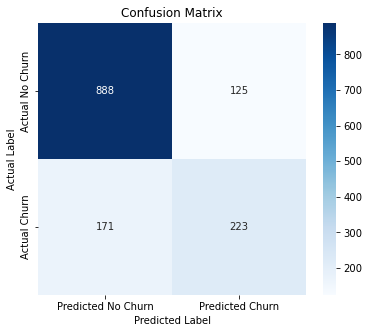


Test Accuracy: 0.7896
Test Recall (Churn): 0.5660


In [50]:
# CELL: Classification Metrics

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Print Classification Report
print("--- Classification Report (Test Set) ---")
# Note: y_test and y_pred were defined in your previous cells
print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(f"\nTest Accuracy: {(cm.trace() / cm.sum()):.4f}")
print(f"Test Recall (Churn): {cm[1, 1] / cm[1, :].sum():.4f}")

ROC AUC Score: 0.8287


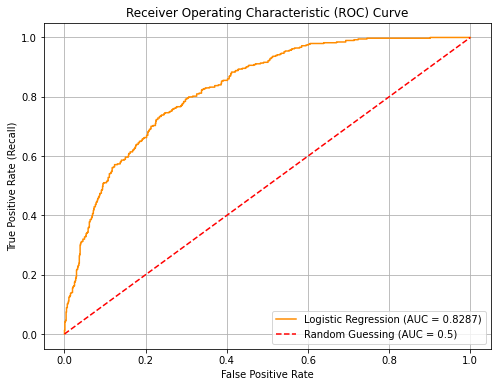

In [51]:
# CELL: ROC Curve and AUC Score

from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability of the positive class (Churn = 1)
y_pred_proba = log_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {auc_score:.4f}")

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [55]:
# CELL: Overfitting Check

# 1. Predict on the training set
y_train_pred = log_model.predict(x_train)

# 2. Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# 3. Calculate test accuracy (re-using previous calculation)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

difference = abs(train_accuracy - test_accuracy)

if difference < 0.03:
    print("\nConclusion: The model performance is similar on both sets. No significant overfitting detected. 👍")
elif train_accuracy > test_accuracy:
    print(f"\nConclusion: Training accuracy is notably higher ({difference:.4f} difference). Potential **overfitting** detected. Consider regularization or more data. ⚠️")
else:
    print("\nConclusion: Test accuracy is higher. This is unusual, but generally means the model is generalizing well. 👌")

Training Accuracy: 0.8089
Test Accuracy: 0.7896

Conclusion: The model performance is similar on both sets. No significant overfitting detected. 👍


In [56]:
# CELL: Hyperparameter Tuning (Grid Search)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2']  # L2 regularization is default for Logistic Regression
}

# Initialize GridSearchCV. We use 'roc_auc' as the scoring metric 
# because it's better for classification problems.
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=100, max_iter=1000), 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

# Fit Grid Search to the training data
grid_search.fit(x_train, y_train)

print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation AUC Score: {grid_search.best_score_:.4f}")

# Train the final model with the best parameters
best_log_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_y_pred = best_log_model.predict(x_test)
best_y_pred_proba = best_log_model.predict_proba(x_test)[:, 1]

print("\n--- Evaluation of Tuned Model ---")
print(f"Tuned Model Test Accuracy: {accuracy_score(y_test, best_y_pred):.4f}")
print(f"Tuned Model Test AUC Score: {roc_auc_score(y_test, best_y_pred_proba):.4f}")

# You can now re-run the evaluation cells (Sections 1 & 2) using:
# log_model = best_log_model 
# y_pred = best_y_pred

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters found: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation AUC Score: 0.8479

--- Evaluation of Tuned Model ---
Tuned Model Test Accuracy: 0.7896
Tuned Model Test AUC Score: 0.8287


In [62]:
# CELL: Save Final Tuned Model and Preprocessors

import joblib
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming the previous tuning cell left the best model in the 'best_log_model' variable
# and the preprocessors (scaler, ord_enc, lab_enc, final_columns) are still available.

if 'best_log_model' in locals():
    # Save the NEW, TUNED model
    joblib.dump(best_log_model, 'log_reg_model.pkl')
    
    # Re-saving preprocessors just to be safe, although they haven't changed.
    # Note: These lines assume you executed the earlier setup cell which created 
    # the preprocessor objects (scaler, ord_enc, lab_enc, final_columns).
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(ord_enc, 'ordinal_encoder.pkl')
    joblib.dump(lab_enc, 'label_encoder.pkl')
    joblib.dump(final_columns, 'final_columns.pkl')
    print("🎉 All deployment artifacts have been successfully updated with the TUNED model!")
    print(f"New Model Test Accuracy: {accuracy_score(y_test, best_log_model.predict(x_test)):.4f}")
    print(f"New Model Test AUC: {roc_auc_score(y_test, best_log_model.predict_proba(x_test)[:, 1]):.4f}")
else:
    print("Error: 'best_log_model' not found. Please ensure you ran the 'Hyperparameter Tuning' cell successfully.")

🎉 All deployment artifacts have been successfully updated with the TUNED model!
New Model Test Accuracy: 0.7896
New Model Test AUC: 0.8287


In [60]:
#### error fix
columns_to_drop = ['gender_Male', 'PaperlessBilling_Yes']
features_to_drop = [col for col in columns_to_drop if col in features.columns]
features_selected = features.drop(columns=features_to_drop)

In [61]:
final_columns = features_selected.columns.tolist()

In [64]:
#### Corrected

# CELL: Complete Pipeline: Fit All Preprocessors, Tune Model, and Save Artifacts

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

# --- 1. Load and Clean Data ---
# Note: Ensure CustomerChurn_RAW.csv is accessible (it is in the working directory)
df_raw = pd.read_csv('CustomerChurn_RAW.csv') 
df_copy = df_raw.copy()

# TotalCharges conversion and NaN handling
df_copy['TotalCharges'] = pd.to_numeric(
    df_copy['TotalCharges'].astype(str).str.replace(' ', ''),
    errors='coerce'
)
df_copy = df_copy.dropna()

# Prepare features and target
features = df_copy.drop(columns=['Churn'])
Target = df_copy['Churn']
features.drop(columns=['customerID'], inplace=True)

# --- 2. Fit Preprocessors ---

# 2a. Ordinal Encoder (FIT)
contract_order = ['Month-to-month', 'One year', 'Two year']
ordinal_categories = [contract_order] 
ordinal_cols = ['Contract']
ord_enc = OrdinalEncoder(categories=ordinal_categories)
features[ordinal_cols] = ord_enc.fit_transform(features[ordinal_cols]) # FITS the encoder

# 2b. One-Hot Encoding
features = pd.get_dummies(features, dtype='int')

# 2c. Label Encoder (FIT)
lab_enc = LabelEncoder()
Target = lab_enc.fit_transform(Target) # FITS the label encoder

# 2d. Feature Selection and StandardScaler (FIT)
columns_to_drop = ['gender_Male', 'PaperlessBilling_Yes']
features_to_drop = [col for col in columns_to_drop if col in features.columns]
features_selected = features.drop(columns=features_to_drop)

# Define final_columns BEFORE scaling
final_columns = features_selected.columns.tolist() 

continuous_features = ['TotalCharges', 'tenure', 'MonthlyCharges']
scaler = StandardScaler()
features_selected[continuous_features] = scaler.fit_transform(features_selected[continuous_features]) # FITS the scaler

# --- 3. Split Data ---
x_train, x_test, y_train, y_test = train_test_split(
    features_selected, 
    Target, 
    train_size=0.8, 
    random_state=100
)

# --- 4. Hyperparameter Tuning (Train Model) ---
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=100, max_iter=1000), 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=5, 
    verbose=0, 
    n_jobs=-1
)
grid_search.fit(x_train, y_train)
best_log_model = grid_search.best_estimator_

# --- 5. Save ALL Fitted Artifacts ---
joblib.dump(best_log_model, 'log_reg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(ord_enc, 'ordinal_encoder.pkl')
joblib.dump(lab_enc, 'label_encoder.pkl')
joblib.dump(final_columns, 'final_columns.pkl')

print("="*60)
print("SUCCESS: All preprocessors and the tuned model have been fitted and saved.")
print(f"Tuned Model Test Accuracy: {accuracy_score(y_test, best_log_model.predict(x_test)):.4f}")
print(f"Tuned Model Test AUC: {roc_auc_score(y_test, best_log_model.predict_proba(x_test)[:, 1]):.4f}")
print("="*60)

SUCCESS: All preprocessors and the tuned model have been fitted and saved.
Tuned Model Test Accuracy: 0.7889
Tuned Model Test AUC: 0.8260


#### updated streamlit

2025-11-08 22:21:26.362 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.544 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-08 22:21:27.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.566 Thread 'MainThread': mi

2025-11-08 22:21:27.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-11-08 22:21:27.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 22:21:27.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar